<a href="https://colab.research.google.com/github/AraiKensuke/GCoh/blob/Include_dpss_bw_in_preprocessver/cluster_eeg_gcoh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install GCoh package**

In [9]:
#########  clone and install necessary packages from github repositories


import sys
import importlib

if importlib.util.find_spec("GCoh") is None:
  !git clone https://github.com/AraiKensuke/GCoh.git

if importlib.util.find_spec("mne") is None:
  !pip install mne

sys.path.insert(1, "/content/GCoh")    #  add these to searchpath for python module

**Upload EDF file to Colab**

Enter filename down below.

Then goto "File" space on the left, choose the upload icon, and upload an EDFfile

Type in filename of uploaded file in to variable "dat"

In [30]:
#dat="8_12_2min_raw[11973].edf"
#dat="Jan092020_15_05_39_artfctrmvd_v1.edf"
dat="Dec012021_02_00_00_artfctrmvd_v1.edf"

**Prepare the data**

In [31]:
import numpy as _N
import scipy.io as _scio
import scipy.stats as _ss
import matplotlib.pyplot as _plt
from scipy.signal import savgol_filter
from sklearn import mixture
import mne
from GCoh.eeg_util import unique_in_order_of_appearance, increasing_labels_mapping, rmpd_lab_trnsfrm, find_GMM_labels, shift_correlated_shuffle, mtfftc
import GCoh.skull_plot as _sp
import os
#import AIiRPS.rpsms as rpsms
import GCoh.preprocess_ver as _ppv
#from AIiRPS.utils.dir_util import getResultFN
import GCoh.datconfig as datconf

import GCoh.windowed_gcoh as _w_gcoh
import warnings
warnings.filterwarnings("ignore")

os.environ["GCoh_on_colab"] = "1"

import sys

def calc_gcoh(X_cm, datset, bad_chs, wnd, slideby):
  #  assign a version number for GCoh calculation here.

  #wnd, slideby      = preprocess_ver.get_win_slideby(gcoh_ver)

  #cm    = 9     #  this is when using Q20
  cm    = None   #  this is when using DSi

  ch_w_CM, rm_chs, ch_names, ch_types = datconf.getConfig(dataset, sim_nchs=10, cm=cm)

  if bad_chs is not None:
      rm_chs.extend(bad_chs)
  ch_picks = _N.setdiff1d(ch_w_CM, _N.array(rm_chs))
  arr_ch_picks = _N.array(ch_picks)

  info = mne.create_info(ch_names=(_N.array(ch_names)[ch_picks]).tolist(), ch_types=(_N.array(ch_types)[ch_picks]).tolist(), sfreq=Fs)

  datconf.set_montage(dataset, info)

  dpss_bw=7
  f, findx, Ctot, Cvec = _w_gcoh.windowed_gcoh(Fs, wnd, slideby, X_cm, ch_w_CM, ch_picks, info, dpss_bw=dpss_bw)

  pkldat = {"VEC" : Cvec, "Cs" : Ctot, "fs" : f[findx], "chs_picks" : arr_ch_picks, "dpss_bw" : dpss_bw}

  return pkldat

def depickle(s):
     import pickle
     with open(s, "rb") as f:
          lm = pickle.load(f)
     return lm


dataset =    datconf._RPS
c    = 2
if dataset == datconf._SIM:
    Fs   = 200
if dataset == datconf._RPS or dataset == datconf._STROOP:
    Fs   = 300
elif dataset == datconf._GONOGO:
    Fs   = 500
elif dataset == datconf._AAFFECT:
    Fs   = 500

ch_w_CM, rm_chs, list_ch_names, ch_types = datconf.getConfig(dataset, sim_nchs=10)
arr_ch_names = _N.array(list_ch_names)

# arr_ch_names=_N.array(["P3", "C3", "F3", "Fz", "F4",   
#                        "C4", "P4", "Cz", "Pz", "A1",    #  "Pz" is "CM"
#                        "Fp1","Fp2","T3", "T5", "O1",
#                        "O2", "F7", "F8", "A2", "T6",
#                        "T4"])

ev_n   = 0


_WIDE = 0
_MED  = 1
_FINE = 2
_FINE1 = 3   #



#bin     = 384
#slide   = 64
_WIDE = 0
_FINE = 1

manual_cluster=False
armv_ver = 1
gcoh_ver = 4   #  bandwidth 7 ver 1, bandwidth 5 ver 2, bandwidth 9 ver 3

#process_keyval_args(globals(), sys.argv[1:])
win, slideby      = _ppv.get_win_slideby(gcoh_ver)

hlfOverlap = int((win/slideby)*0.5)

eegedf = mne.io.read_raw_edf(dat)
eegdat = eegedf.get_data()

####  Low-pass filter the channels
eeg_LP = _N.array(eegdat)

for ich in range(25):
    eeg_LP[ich] = mne.filter.filter_data(eegdat[ich], 300, 1, 100, verbose=False)

Extracting EDF parameters from /content/Dec012021_02_00_00_artfctrmvd_v1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [ ]:
eegdat.shape

(25, 182400)

**Now run GCoh on LPd EEG data**

In [32]:
gcoh_pkl = calc_gcoh(eeg_LP.T, dataset, None, 512, 256)
vec_mag = _N.abs(gcoh_pkl["VEC"])
fs_gcoh = gcoh_pkl["fs"]
fs_gcoh

    Using multitaper spectrum estimation with 11 DPSS windows
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
win 0 of 711
win 20 of 711
win 40 of 711
win 60 of 711
win 80 of 711
win 100 of 711
win 120 of 711
win 140 of 711
win 160 of 711
win 180 of 711
win 200 of 711
win 220 of 711
win 240 of 711
win 260 of 711
win 280 of 711
win 300 of 711
win 320 of 711
win 340 of 711
win 360 of 711
win 380 of 711
win 400 of 711
win 420 of 711
win 440 of 711
win 460 of 711
win 480 of 711
win 500 of 711
win 520 of 711
win 540 of 711
win 560 of 711
win 580 of 711
win 600 of 711
win 620 of 711
win 640 of 711
win 660 of 711
win 680 of 711
win 700 of 711


array([ 5.2734375,  5.859375 ,  6.4453125,  7.03125  ,  7.6171875,
        8.203125 ,  8.7890625,  9.375    ,  9.9609375, 10.546875 ,
       11.1328125, 11.71875  , 12.3046875, 12.890625 , 13.4765625,
       14.0625   , 14.6484375, 15.234375 , 15.8203125, 16.40625  ,
       16.9921875, 17.578125 , 18.1640625, 18.75     , 19.3359375,
       19.921875 , 20.5078125, 21.09375  , 21.6796875, 22.265625 ,
       22.8515625, 23.4375   , 24.0234375, 24.609375 , 25.1953125,
       25.78125  , 26.3671875, 26.953125 , 27.5390625, 28.125    ,
       28.7109375, 29.296875 , 29.8828125, 30.46875  , 31.0546875,
       31.640625 , 32.2265625, 32.8125   , 33.3984375, 33.984375 ,
       34.5703125, 35.15625  , 35.7421875, 36.328125 , 36.9140625,
       37.5      , 38.0859375, 38.671875 , 39.2578125, 39.84375  ,
       40.4296875, 41.015625 , 41.6015625, 42.1875   , 42.7734375,
       43.359375 , 43.9453125, 44.53125  , 45.1171875, 45.703125 ,
       46.2890625, 46.875    , 47.4609375, 48.046875 , 48.6328

**Plot the EV timeseries**

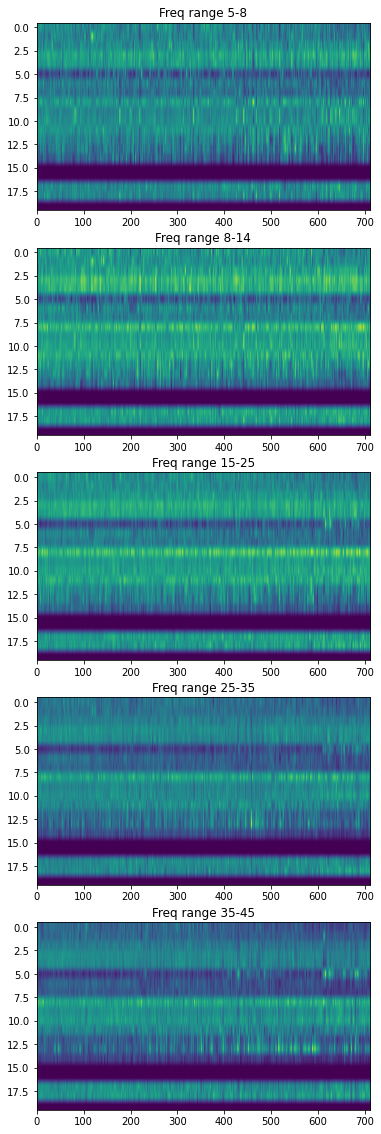

In [33]:
f_ranges = [[5,8], [8, 14], [15, 25],[25, 35], [35, 45]]

fig = _plt.figure(figsize=(10, 4*len(f_ranges)))

fi = 0
for frng in f_ranges:
  fi += 1
  fig.add_subplot(len(f_ranges), 1, fi) 
  finds = _N.where((fs_gcoh >= frng[0]) & (fs_gcoh < frng[1]))[0]
  gcoh_frng = _N.mean(vec_mag[:, finds], axis=1)

  _plt.title("Freq range %(1)d-%(2)d" % {"1" : frng[0], "2" : frng[1]})
  _plt.imshow(gcoh_frng[:, 0].T, aspect=20)

